## **0. Data** **불러오기** 

In [2]:
import pandas as pd
df=pd.read_csv('https://bit.ly/ds-house-price',index_col='지역명')
print(df)

                  규모구분    연도   월 분양가격(㎡)
지역명                                     
서울                  전체  2015  10    5841
서울          전용면적 60㎡이하  2015  10    5652
서울    전용면적 60㎡초과 85㎡이하  2015  10    5882
서울   전용면적 85㎡초과 102㎡이하  2015  10    5721
서울         전용면적 102㎡초과  2015  10    5879
..                 ...   ...  ..     ...
제주                  전체  2020   2    3955
제주          전용면적 60㎡이하  2020   2    4039
제주    전용면적 60㎡초과 85㎡이하  2020   2    3962
제주   전용면적 85㎡초과 102㎡이하  2020   2     NaN
제주         전용면적 102㎡초과  2020   2    3601

[4505 rows x 4 columns]


## **1. Data Sampling**
 - 지역명을 index column으로 지정하기
 - Column 재정의: 분양가격의 특수문자 제거
 - 빈 값의 확인 및 Data type 확인
 - 통계정보를 확인하여 int타입으로 변형
 - 데이터 공백 제거 및 결측치 채우기
 - 콤마 데이터 제거
 - 불필요한 column 제거


- column의 특수문자 제거 및 확인

In [3]:
df=df.rename(columns={'분양가격(㎡)':'분양가격'})
#확인

df.head()

,규모구분,연도,월,분양가격
지역명,,,,
서울,전체,2015,10,5841
서울,전용면적 60㎡이하,2015,10,5652
서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
서울,전용면적 102㎡초과,2015,10,5879


- 데이터타입 및 통계값 확인: data type에 뜨지 않는 값은 문자열로, int로 변경해줘야함

In [4]:
#데이터타입,통계값 확인
print(df.info())
print(df.describe())
df.count()

##null값 가중치 
num=df['연도'].count() / df['분양가격'].count()
print(num)

<class 'pandas.core.frame.DataFrame'>
Index: 4505 entries, 서울 to 제주
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   규모구분    4505 non-null   object
 1   연도      4505 non-null   int64 
 2   월       4505 non-null   int64 
 3   분양가격    4210 non-null   object
dtypes: int64(2), object(2)
memory usage: 176.0+ KB
None
                연도            월
count  4505.000000  4505.000000
mean   2017.452830     6.566038
std       1.311432     3.595519
min    2015.000000     1.000000
25%    2016.000000     3.000000
50%    2017.000000     7.000000
75%    2019.000000    10.000000
max    2020.000000    12.000000
1.0700712589073633


- 콤마 제거, 분양가격의 결측지 제거 

In [5]:
df['분양가격']=df['분양가격'].str.strip()

#콤마를 제거함
df['분양가격']=df['분양가격'].str.replace(',','')

#분양가격이 -인 행에 대해 공백으로 바꿔줌
df['분양가격']=df['분양가격'].str.replace('-','')

# 분양가격이 ''인 행에 대해 0을 넣어줌
df.loc[df['분양가격']=='', '분양가격'] = 0

#분양가격이 Nan인 값을 0으로 채워줌
df['분양가격']=df['분양가격'].fillna(0)







- 정수형 데이터로 바꿔주기

In [6]:
#분양가격을 정수형 데이터로 바꿔줌
df.loc[df['분양가격']=='','분양가격']=0
df['분양가격']=df['분양가격'].astype(int)

분양가격평균=df['분양가격'].mean() * num
print(분양가격평균)

#0으로 넣은 값을 평균으로 바꿔줌
df.loc[df['분양가격']==0,'분양가격']= 분양가격평균

print(df)

#분양가격이 int값으로 바뀐 것 확인
#결측치를 결측치 제외 분양가격의 평균으로 채워준 후의 분양가격 통계량
print(df.describe())


3240.22755344418
                  규모구분    연도   월         분양가격
지역명                                          
서울                  전체  2015  10  5841.000000
서울          전용면적 60㎡이하  2015  10  5652.000000
서울    전용면적 60㎡초과 85㎡이하  2015  10  5882.000000
서울   전용면적 85㎡초과 102㎡이하  2015  10  5721.000000
서울         전용면적 102㎡초과  2015  10  5879.000000
..                 ...   ...  ..          ...
제주                  전체  2020   2  3955.000000
제주          전용면적 60㎡이하  2020   2  4039.000000
제주    전용면적 60㎡초과 85㎡이하  2020   2  3962.000000
제주   전용면적 85㎡초과 102㎡이하  2020   2  3240.227553
제주         전용면적 102㎡초과  2020   2  3601.000000

[4505 rows x 4 columns]
                연도            월          분양가격
count  4505.000000  4505.000000   4505.000000
mean   2017.452830     6.566038   3258.208838
std       1.311432     3.595519   1240.703214
min    2015.000000     1.000000   1868.000000
25%    2016.000000     3.000000   2478.000000
50%    2017.000000     7.000000   2990.000000
75%    2019.000000    10.000000   3526

- 불필요한 '규모구분' 데이터 제거하기

In [7]:
df=df.drop('규모구분',axis=1)
df

,연도,월,분양가격
지역명,,,
서울,2015,10,5841.000000
서울,2015,10,5652.000000
서울,2015,10,5882.000000
서울,2015,10,5721.000000
서울,2015,10,5879.000000
...,...,...,...
제주,2020,2,3955.000000
제주,2020,2,4039.000000
제주,2020,2,3962.000000


##**2. Data Partitioning**





In [8]:
from sklearn.model_selection import train_test_split
y = df['분양가격']
y_train, y_test = train_test_split(y, train_size=0.7, test_size=0.3, random_state=50)
print(y_train)

지역명
경기    4219.0
대구    3147.0
경남    2383.0
전남    3003.0
전남    2264.0
       ...  
부산    4068.0
경북    2148.0
강원    2193.0
충남    2623.0
전북    2352.0
Name: 분양가격, Length: 3153, dtype: float64


## **3. EDA**

In [9]:
import numpy as np
condition = (df.index=='서울')|(df.index=='경기')|(df.index=='인천')|(df.index=='부산')    
df2 = df[condition]                      # 수도권 지역의 데이터 셋을 따로 추출해 주었다.

# cs15 = (df2.index=='서울')&(df2.연도 == 2015)
# s15 = df2[cs15].분양가격.mean()
# s15

a = ['서울','경기','인천','부산']
b = [2015,2016,2017,2018,2019,2020]
c1 = []
for i in a:
  for j in b:
    c = (df2.index==i) & (df2.연도==j)
    c1.append(df2[c].분양가격.mean())
print(c1)                                #c1 은 각 지역별 및 각 연도마다 분양가의 평균값을 의미한다 

[6156.266666666666, 6591.95, 6625.483333333334, 7030.983333333334, 8571.766666666666, 9327.2, 3351.8, 3540.9, 3726.116666666667, 4320.733333333334, 4747.133333333333, 4888.7, 3326.0666666666666, 3363.35, 3537.1, 3576.448503562946, 4015.0833333333335, 4183.6, 3144.6666666666665, 3255.616666666667, 3526.55, 3906.05, 4102.383333333333, 4057.3]


In [10]:
r = []
y = [] 
a = ['서울','경기','인천','부산']
b = [2015,2016,2017,2018,2019,2020]
for i in range(4):
  for j in range(6):
    r.append(a[i])

for i in range(4):
  for j in range(6):
    y.append(b[j])



avg_df = pd.DataFrame({'지역명':r,
                        '년도':y,
                        '분양평균가':c1})
avg_df

,지역명,년도,분양평균가
0,서울,2015,6156.266667
1,서울,2016,6591.950000
2,서울,2017,6625.483333
3,서울,2018,7030.983333
4,서울,2019,8571.766667
5,서울,2020,9327.200000
6,경기,2015,3351.800000
7,경기,2016,3540.900000
8,경기,2017,3726.116667
9,경기,2018,4320.733333


꺾은선 그래프 

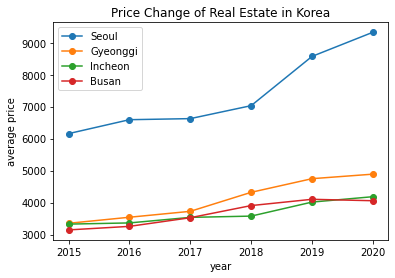

In [11]:

#년도':y,
#'분양평균가':c
# seoul= c[0:6]
condition_S = (avg_df.지역명=='서울')
seoul = avg_df.loc[condition_S,'분양평균가']
gyeonggi=c1[6:12]
incheon = c1[12:18]
busan = c1[18:24]
import matplotlib.pyplot as plt
plt.plot(b,seoul, marker='o',label='Seoul')
plt.plot(b,gyeonggi, marker='o',label='Gyeonggi')
plt.plot(b,incheon, marker='o',label='Incheon')
plt.plot(b,busan, marker='o',label='Busan')
plt.xlabel('year')
plt.ylabel('average price')
plt.title('Price Change of Real Estate in Korea')
plt.legend()
plt.show()            #2015~2020 약 6년간 수도권 및 부산의 부동산 가격 변화 추이 
                      # 서울 집값이 타지역에 비해 기하 급수적으로 증가한 것을 볼 수 있음 


## **4. anomaly detection**

In [12]:
#replacing remaning outliers by mean
import seaborn as sns
import numpy as np

q1, q3 = np.nanpercentile(df, [25,75])
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
y_train.loc[y_train < lower_bound] = y_train.mean() 
y_train.loc[y_train > upper_bound] = 30 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'real estate price')

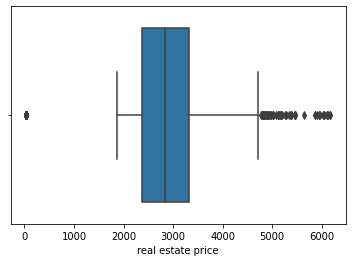

In [13]:
sns.boxplot(y_train)
plt.xlabel('real estate price')